In [2]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from qiskit import( ClassicalRegister,
        QuantumRegister,
        QuantumCircuit,
        execute,
        Aer,
        transpile
        )
from qiskit.visualization import( plot_histogram,
        plot_state_city)
mpl.rcParams['figure.figsize'] = 11,8
mpl.rcParams.update({'font.size' : 15})

In [3]:
def simul(qc,stateVec,shots):
    if stateVec:
        backend = Aer.get_backend('statevector_simulator')
        result = execute(qc,backend,shots=shots).result().get_statevector(qc,decimals=3)
    else:
        backend = Aer.get_backend('qasm_simulator')
        result = execute(qc,backend,shots=shots).result().get_counts()
    return result

def decResultDict(n):
    "Retuns a dictionary composed of a range of N keys converted to binary."
    baseDict = {}
    for decNumber in range(2**n):
        dec = decNumber 
        baseDict[dec] = 0
    return baseDict

def normalizedResults(resultsDict,n,shots):
    decDict = decResultDict(n)
    correctedResults = {int(k,2) : v/shots for k,v in resultsDict.items()}
    newDict1 = correctedResults
    newDict2 = decDict
    normalizedResults = {**newDict2,**newDict1}
    return normalizedResults

In [4]:
def c_increment(n):
    c_inc = QuantumCircuit(n)
    controls = [x for x in range(n-1)]
    for p in range(n-1):
        c_inc.mcx(controls,controls[-1] + 1)
        controls.pop()
    c_inc.x(0)
    return c_inc
    
def c_decrement(n):
    c_dec = QuantumCircuit(n)
    controls = [x for x in range(n-1)]
    c_dec.x(controls)
    for p in range(n-2):
        c_dec.mcx(controls,controls[-1] + 1)
        c_dec.x(controls[-1])
        controls.pop()   
    c_dec.cx(0,1)
    return c_dec

def initialCond(qc,string,N):
    for x in range(N):
        if string[x] == '1':
            qc.x(x)
    return qc

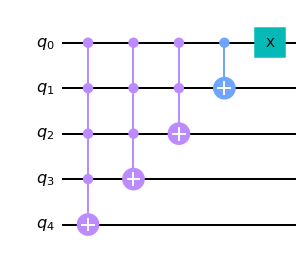

In [5]:
N=5
teta = np.pi/3
steps = 3

qreg = QuantumRegister(N)
creg = ClassicalRegister(N)
qc=QuantumCircuit(qreg,creg)
qc.x(qreg[N-1])

qcInc = c_increment(N)
qcDec = c_decrement(N)

for step in range(steps):
    qc.rx(2*teta,qreg[0])
    qc.barrier()
    qc.append(qcInc,qreg)
    qc.barrier()
    qc.rx(2*teta,qreg[0])
    qc.barrier()
    qc.append(qcDec,qreg)
    qc.barrier()

#qc.draw(output='mpl')
qcInc.draw(output='mpl')

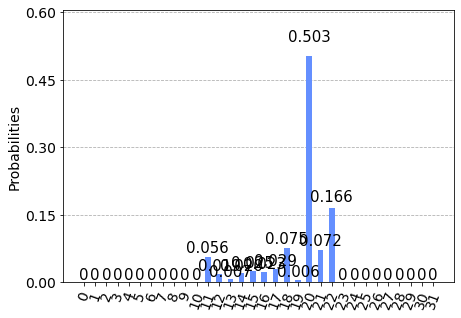

In [19]:
results=normalizedResults(simul(qc,False,3000),N,3000)
plot_histogram(results)